In [1]:
import shap
X, y = shap.datasets.adult()
X_display, y_display = shap.datasets.adult(display=True)
feature_names = list(X.columns)
feature_names

['Age',
 'Workclass',
 'Education-Num',
 'Marital Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital Gain',
 'Capital Loss',
 'Hours per week',
 'Country']

Age     Workclass  Education-Num  Marital Status  \
count  32561.000000  32561.000000   32561.000000    32561.000000   
mean      38.581646      3.868892      10.080679        2.611836   
std       13.640442      1.455960       2.572562        1.506222   
min       17.000000      0.000000       1.000000        0.000000   
25%       28.000000      4.000000       9.000000        2.000000   
50%       37.000000      4.000000      10.000000        2.000000   
75%       48.000000      4.000000      12.000000        4.000000   
max       90.000000      8.000000      16.000000        6.000000   

         Occupation  Relationship          Race           Sex  Capital Gain  \
count  32561.000000  32561.000000  32561.000000  32561.000000  32561.000000   
mean       6.572740      2.494518      3.665858      0.669205   1077.648804   
std        4.228857      1.758232      0.848806      0.470506   7385.911621   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.000000      0.000000      4.000000      0.000000      0.000000   
50%        7.000000      3.000000      4.000000      1.000000      0.000000   
75%       10.000000      4.000000      4.000000      1.000000      0.000000   
max       14.000000      5.000000      4.000000      1.000000  99999.000000   

       Capital Loss  Hours per week       Country  
count  32561.000000    32561.000000  32561.000000  
mean      87.303833       40.437454     36.718866  
std      403.014771       12.347933      7.823782  
min        0.000000        1.000000      0.000000  
25%        0.000000       40.000000     39.000000  
50%        0.000000       40.000000     39.000000  
75%        0.000000       45.000000     39.000000  
max     4356.000000       99.000000     41.000000

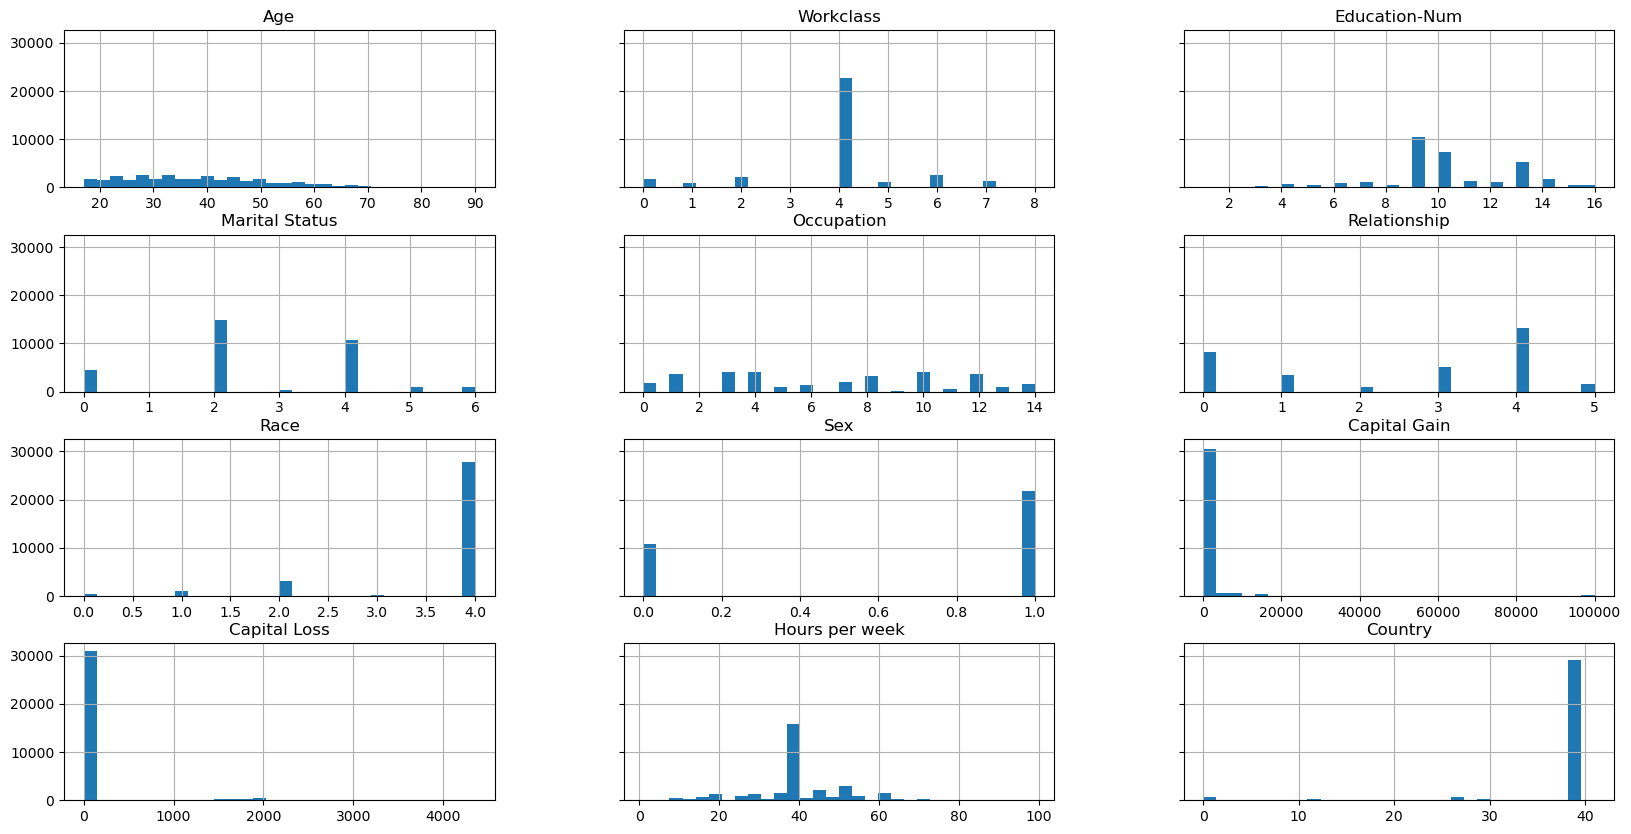

In [2]:
display(X.describe())
hist = X.hist(bins=30, sharey=True, figsize=(20, 10))

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train_display = X_display.loc[X_train.index]

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
X_train_display = X_display.loc[X_train.index]
X_val_display = X_display.loc[X_val.index]

In [5]:
import pandas as pd
train = pd.concat([pd.Series(y_train, index=X_train.index,
                             name='Income>50K', dtype=int), X_train], axis=1)
validation = pd.concat([pd.Series(y_val, index=X_val.index,
                            name='Income>50K', dtype=int), X_val], axis=1)
test = pd.concat([pd.Series(y_test, index=X_test.index,
                            name='Income>50K', dtype=int), X_test], axis=1)

In [6]:
train

Income>50K   Age  Workclass  Education-Num  Marital Status  Occupation  \
10911           1  47.0          4            9.0               2           3   
17852           0  31.0          4           13.0               2           7   
29165           1  32.0          4           10.0               2          13   
30287           0  58.0          4            9.0               2           3   
24019           0  17.0          4            6.0               4           6   
...           ...   ...        ...            ...             ...         ...   
21168           0  43.0          4            8.0               2          14   
6452            0  26.0          4            9.0               4           7   
31352           0  32.0          7           14.0               2          10   
6575            0  45.0          4            9.0               4           6   
23608           0  23.0          4            9.0               4           1   

       Relationship  Race  Sex  Capital Gain  Capital Loss  Hours per week  \
10911             4     4    1           0.0           0.0            40.0   
17852             4     3    1           0.0           0.0            36.0   
29165             5     4    0           0.0           0.0            32.0   
30287             4     2    1           0.0           0.0            40.0   
24019             3     4    1           0.0           0.0            20.0   
...             ...   ...  ...           ...           ...             ...   
21168             4     4    1           0.0           0.0            40.0   
6452              0     4    1           0.0           0.0            52.0   
31352             4     4    1           0.0           0.0            50.0   
6575              0     4    1           0.0           0.0            40.0   
23608             1     4    0           0.0           0.0            40.0   

       Country  
10911       39  
17852       26  
29165       39  
30287       39  
24019       39  
...        ...  
21168       39  
6452        39  
31352       39  
6575        39  
23608       39  

[19536 rows x 13 columns]

In [7]:
validation

Income>50K   Age  Workclass  Education-Num  Marital Status  Occupation  \
16530           0  25.0          4            4.0               2           6   
26723           0  41.0          6            9.0               2           5   
3338            0  79.0          0            9.0               6           0   
19367           1  43.0          2           15.0               2          10   
30274           0  51.0          5            9.0               4          12   
...           ...   ...        ...            ...             ...         ...   
1604            0  46.0          7            9.0               2          13   
5937            1  71.0          4           10.0               6          12   
11034           0  36.0          4            9.0               5          14   
2819            0  31.0          4            9.0               4           8   
14152           1  37.0          4           10.0               2          12   

       Relationship  Race  Sex  Capital Gain  Capital Loss  Hours per week  \
16530             4     4    1           0.0           0.0            40.0   
26723             5     4    0           0.0           0.0            40.0   
3338              0     2    0           0.0           0.0            30.0   
19367             4     4    1       15024.0           0.0            45.0   
30274             2     4    1           0.0           0.0            40.0   
...             ...   ...  ...           ...           ...             ...   
1604              4     4    1           0.0           0.0            40.0   
5937              0     4    1           0.0           0.0            35.0   
11034             2     4    1           0.0           0.0            60.0   
2819              0     4    0           0.0           0.0            40.0   
14152             4     4    1           0.0           0.0            50.0   

       Country  
16530       26  
26723       39  
3338        39  
19367       39  
30274        0  
...        ...  
1604        39  
5937        39  
11034       26  
2819        39  
14152       11  

[6512 rows x 13 columns]

In [8]:
# Use 'csv' format to store the data
# The first column is expected to be the output column
train.to_csv('train.csv', index=False, header=False)
validation.to_csv('validation.csv', index=False, header=False)

In [9]:
import sagemaker, boto3, os
bucket = sagemaker.Session().default_bucket()
prefix = "demo-sagemaker-xgboost-adult-income-prediction"

boto3.Session().resource('s3').Bucket(bucket).Object(
    os.path.join(prefix, 'data/train.csv')).upload_file('train.csv')
boto3.Session().resource('s3').Bucket(bucket).Object(
    os.path.join(prefix, 'data/validation.csv')).upload_file('validation.csv')


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


In [10]:
! aws s3 ls {bucket}/{prefix}/data --recursive

2024-04-18 02:28:35     786285 demo-sagemaker-xgboost-adult-income-prediction/data/train.csv
2024-04-18 02:28:35     262122 demo-sagemaker-xgboost-adult-income-prediction/data/validation.csv


In [11]:
import sagemaker

region = sagemaker.Session().boto_region_name
print("AWS Region: {}".format(region))

role = sagemaker.get_execution_role()
print("RoleArn: {}".format(role))

AWS Region: ap-south-1
RoleArn: arn:aws:iam::143861992431:role/service-role/AmazonSageMakerServiceCatalogProductsUseRole


In [12]:
from sagemaker.debugger import Rule, ProfilerRule, rule_configs
from sagemaker.session import TrainingInput

s3_output_location='s3://{}/{}/{}'.format(bucket, prefix, 'xgboost_model')

container=sagemaker.image_uris.retrieve("xgboost", region, "1.2-1")
print(container)

xgb_model=sagemaker.estimator.Estimator(
    image_uri=container,
    role=role,
    instance_count=1,
    instance_type='ml.m4.xlarge',
    volume_size=5,
    output_path=s3_output_location,
    sagemaker_session=sagemaker.Session(),
    rules=[
        Rule.sagemaker(rule_configs.create_xgboost_report()),
        ProfilerRule.sagemaker(rule_configs.ProfilerReport())
    ]
)

720646828776.dkr.ecr.ap-south-1.amazonaws.com/sagemaker-xgboost:1.2-1


In [13]:
xgb_model.set_hyperparameters(
    max_depth = 5,
    eta = 0.2,
    gamma = 4,
    min_child_weight = 6,
    subsample = 0.7,
    objective = "binary:logistic",
    num_round = 1000
)

In [14]:
from sagemaker.session import TrainingInput

train_input = TrainingInput(
    "s3://{}/{}/{}".format(bucket, prefix, "data/train.csv"), content_type="csv"
)
validation_input = TrainingInput(
    "s3://{}/{}/{}".format(bucket, prefix, "data/validation.csv"), content_type="csv"
)

In [15]:
xgb_model.fit({"train": train_input, "validation": validation_input}, wait=True)

INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2024-04-18-02-31-04-724


2024-04-18 02:31:05 Starting - Starting the training job...
2024-04-18 02:31:28 Starting - Preparing the instances for trainingCreateXgboostReport: InProgress
ProfilerReport: InProgress
......
2024-04-18 02:32:28 Downloading - Downloading input data...
2024-04-18 02:32:52 Downloading - Downloading the training image......
2024-04-18 02:33:49 Training - Training image download completed. Training in progress.[2024-04-18 02:33:54.271 ip-10-0-145-232.ap-south-1.compute.internal:7 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value binary:logistic to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is 

In [16]:
rule_output_path = xgb_model.output_path + "/" + xgb_model.latest_training_job.job_name + "/rule-output"
! aws s3 ls {rule_output_path} --recursive

2024-04-18 02:35:10     322354 demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2024-04-18-02-31-04-724/rule-output/ProfilerReport/profiler-output/profiler-report.html
2024-04-18 02:35:10     168691 demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2024-04-18-02-31-04-724/rule-output/ProfilerReport/profiler-output/profiler-report.ipynb
2024-04-18 02:35:06        191 demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2024-04-18-02-31-04-724/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json
2024-04-18 02:35:06        199 demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2024-04-18-02-31-04-724/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
2024-04-18 02:35:06        126 demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2024-04-18-02-31-04-724/rule-output/ProfilerReport/profiler-output/prof

In [17]:
! aws s3 cp {rule_output_path} ./ --recursive

download: s3://sagemaker-ap-south-1-143861992431/demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2024-04-18-02-31-04-724/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json to ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
download: s3://sagemaker-ap-south-1-143861992431/demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2024-04-18-02-31-04-724/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json to ProfilerReport/profiler-output/profiler-reports/Dataloader.json
download: s3://sagemaker-ap-south-1-143861992431/demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2024-04-18-02-31-04-724/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json to ProfilerReport/profiler-output/profiler-reports/BatchSize.json
download: s3://sagemaker-ap-south-1-143861992431/demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/s

In [18]:
from IPython.display import FileLink, FileLinks
display("Click link below to view the XGBoost Training report", FileLink("CreateXgboostReport/xgboost_report.html"))

'Click link below to view the XGBoost Training report'

/home/ec2-user/SageMaker/CreateXgboostReport/xgboost_report.html

In [19]:
profiler_report_name = [rule["RuleConfigurationName"] 
                        for rule in xgb_model.latest_training_job.rule_job_summary() 
                        if "Profiler" in rule["RuleConfigurationName"]][0]
profiler_report_name
display("Click link below to view the profiler report", FileLink(profiler_report_name+"/profiler-output/profiler-report.html"))

'Click link below to view the profiler report'

/home/ec2-user/SageMaker/ProfilerReport/profiler-output/profiler-report.html

In [20]:
xgb_model.model_data

's3://sagemaker-ap-south-1-143861992431/demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2024-04-18-02-31-04-724/output/model.tar.gz'

In [21]:
import sagemaker
from sagemaker.serializers import CSVSerializer
xgb_predictor=xgb_model.deploy(
    initial_instance_count=1,
    instance_type='ml.t2.medium',
    serializer=CSVSerializer()
)

INFO:sagemaker:Creating model with name: sagemaker-xgboost-2024-04-18-02-36-09-251
INFO:sagemaker:Creating endpoint-config with name sagemaker-xgboost-2024-04-18-02-36-09-251
INFO:sagemaker:Creating endpoint with name sagemaker-xgboost-2024-04-18-02-36-09-251


--------!

In [22]:
xgb_predictor.endpoint_name

'sagemaker-xgboost-2024-04-18-02-36-09-251'

In [23]:
import numpy as np
def predict(data, rows=1000):
    split_array = np.array_split(data, int(data.shape[0] / float(rows) + 1))
    predictions = ''
    for array in split_array:
        predictions = ','.join([predictions, xgb_predictor.predict(array).decode('utf-8')])
    return np.fromstring(predictions[1:], sep=',')

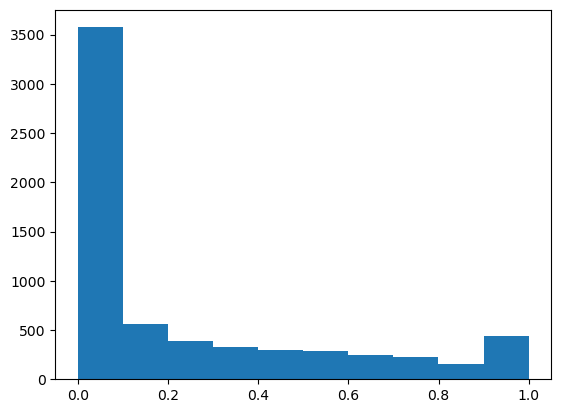

In [24]:
import matplotlib.pyplot as plt

predictions=predict(test.to_numpy()[:,1:])
plt.hist(predictions)
plt.show()

In [25]:
import sklearn

cutoff=0.5
print(sklearn.metrics.confusion_matrix(test.iloc[:, 0], np.where(predictions > cutoff, 1, 0)))
print(sklearn.metrics.classification_report(test.iloc[:, 0], np.where(predictions > cutoff, 1, 0)))

[[4670  356]
 [ 480 1007]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      5026
           1       0.74      0.68      0.71      1487

    accuracy                           0.87      6513
   macro avg       0.82      0.80      0.81      6513
weighted avg       0.87      0.87      0.87      6513



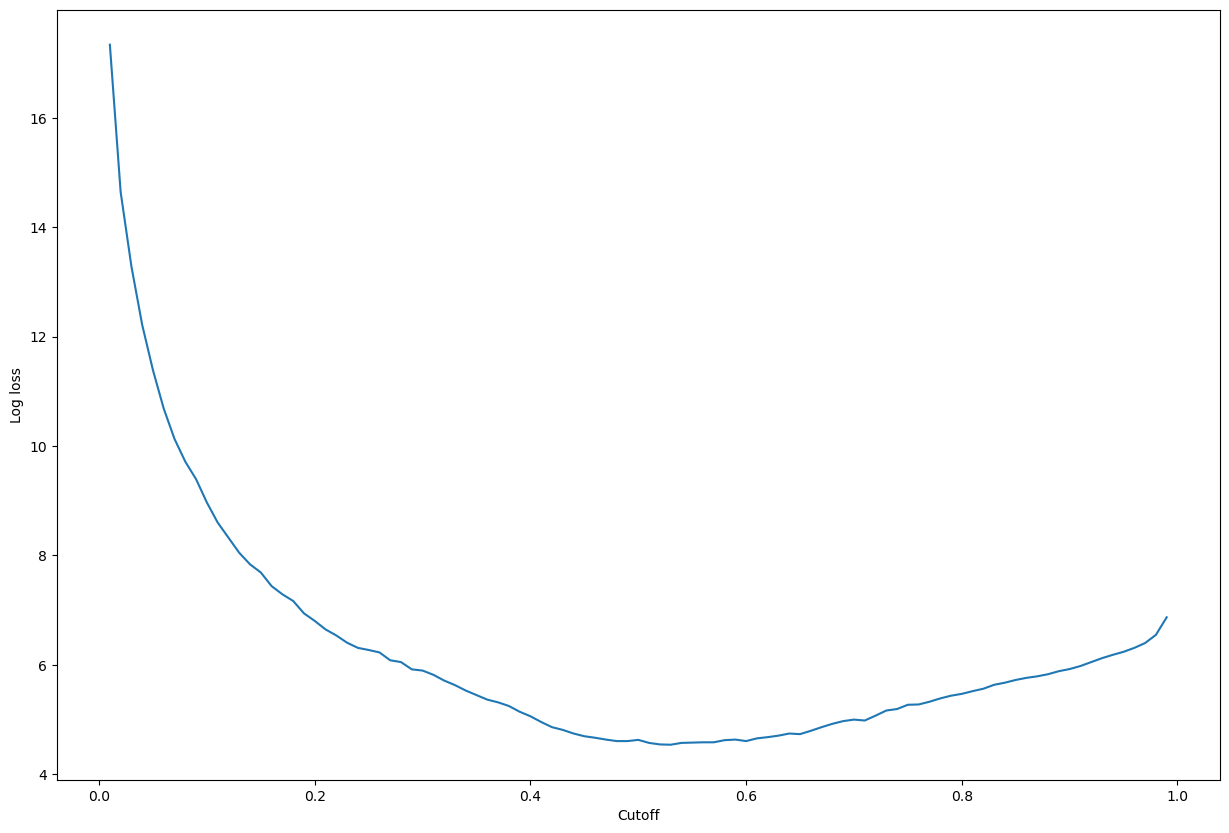

In [26]:
import matplotlib.pyplot as plt

cutoffs = np.arange(0.01, 1, 0.01)
log_loss = []
for c in cutoffs:
    log_loss.append(
        sklearn.metrics.log_loss(test.iloc[:, 0], np.where(predictions > c, 1, 0))
    )

plt.figure(figsize=(15,10))
plt.plot(cutoffs, log_loss)
plt.xlabel("Cutoff")
plt.ylabel("Log loss")
plt.show()

In [27]:
print(
    'Log loss is minimized at a cutoff of ', cutoffs[np.argmin(log_loss)], 
    ', and the log loss value at the minimum is ', np.min(log_loss)
)

Log loss is minimized at a cutoff of  0.53 , and the log loss value at the minimum is  4.537969565342555
